Name:- Sourabh Solanki
    
Batch:- DS2403

#                                                  
Project Description


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
    
•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task:
    
    One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file.


# Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


# Loading Data Set

In [ ]:
df = pd.read_csv('avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# EDA And Visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [ ]:
#checking missing values or null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
#unique vales in  the categorical coloumns
print(df['type'].unique())
print(df['region'].nunique())

['conventional' 'organic']
54


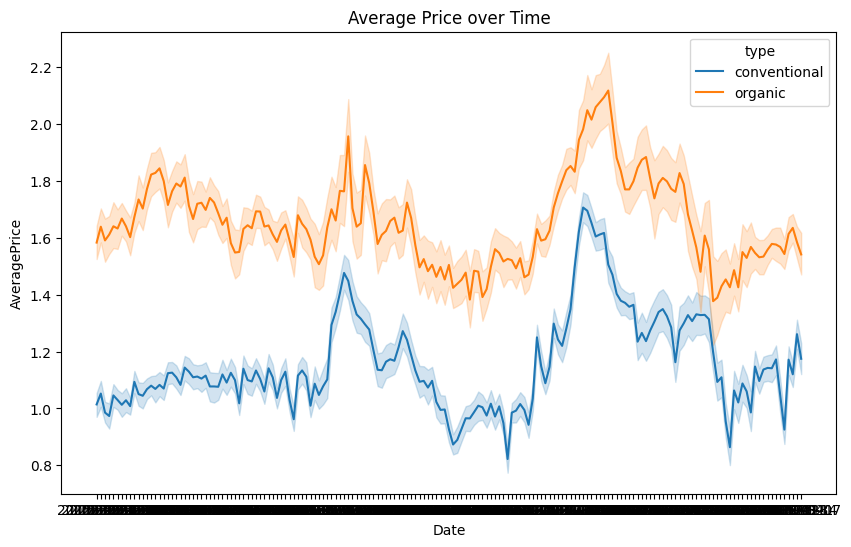

In [ ]:
#Visualizations
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Date', y='AveragePrice', hue='type')
plt.title('Average Price over Time')
plt.show()

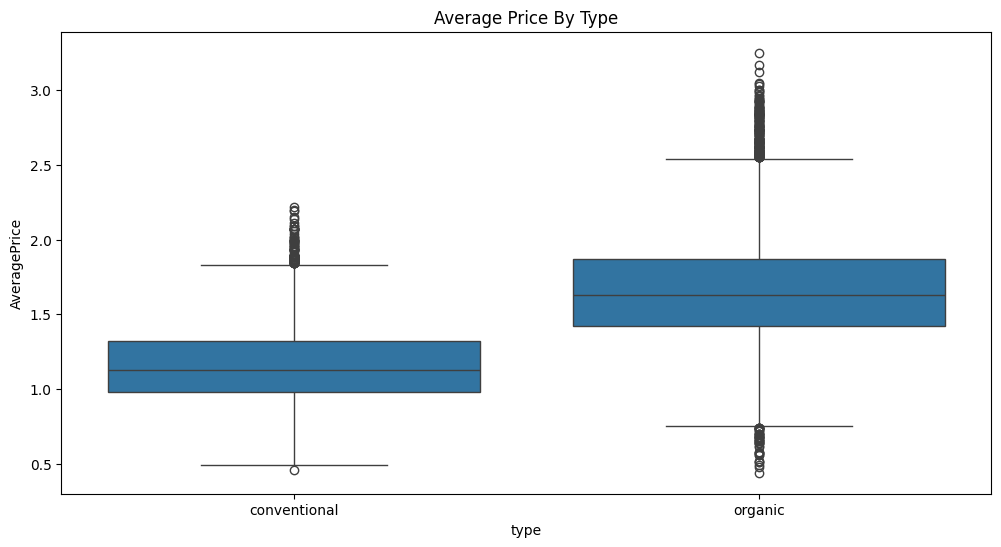

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.title('Average Price By Type')
plt.show()

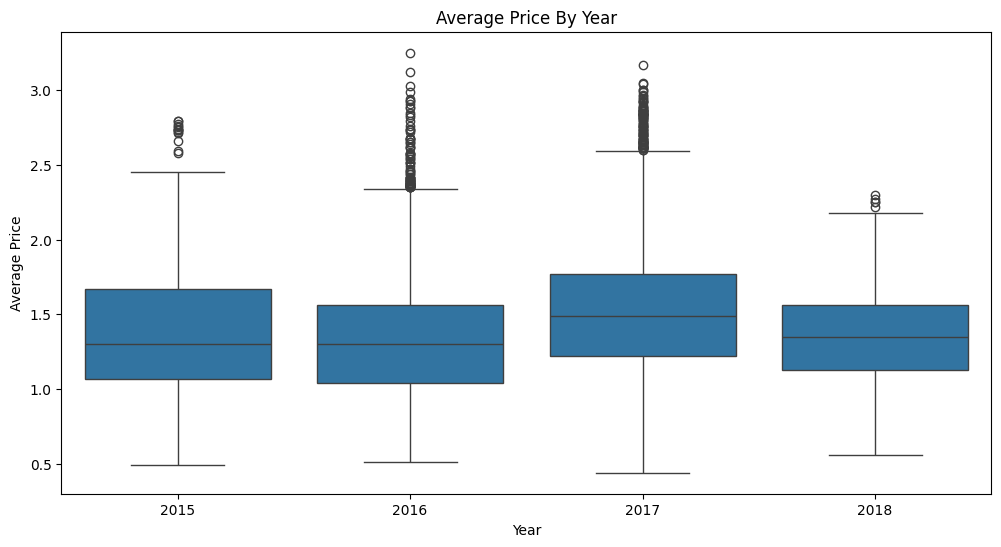

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='AveragePrice', data=df)
plt.title('Average Price By Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [ ]:
#lets Convert the date Columns
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
#Extract Month from date column And day
df['Month']=pd.to_datetime(df['Date']).dt.month
df['day']=pd.to_datetime(df['Date']).dt.day

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int32
day               int32
dtype: object

# Label Encoding

In [ ]:
#label encoding for type and region categorical values
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])


# Model Building


In [ ]:
#select Feature and Target Variable
X= df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Month', 'year']]
y_regression = df['AveragePrice']
y_classification = df['type']

In [ ]:
#split the data
X_train_reg, X_test, y_train_reg , y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Build Regression Model

In [ ]:
#define the models
models_reg = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

#Evalute the Models
for name, model in models_reg.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test_reg, y_pred)}")
    print('-' * 30)

Linear Regression Performance:
Mean Squared Error: 1.3878092883642555e-31
R^2 Score: 1.0
------------------------------
Random Forest Performance:
Mean Squared Error: 5.615616438356028e-06
R^2 Score: 0.9999650485561852
------------------------------
Support Vector Regressor Performance:
Mean Squared Error: 0.1089273287082941
R^2 Score: 0.3220392719057906
------------------------------
Ridge Regression Performance:
Mean Squared Error: 3.106482554815313e-08
R^2 Score: 0.9999998066533716
------------------------------
Lasso Regression Performance:
Mean Squared Error: 0.15424868319019105
R^2 Score: 0.039960395584067054
------------------------------
K-Nearest Neighbors Performance:
Mean Squared Error: 0.07676948164383562
R^2 Score: 0.5221888364668321
------------------------------


# Classification Models

In [ ]:
#Define Multiple Models
models_clf ={
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors Classifier': KNeighborsClassifier(),
    'SVM Classifier': SVC(random_state=42)
}

#evaluate the model
for name, model in models_clf.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred = model.predict(X_test_clf)
    print(f"{name} Performance:")
    print(classification_report(y_test_clf, y_pred))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test_clf, y_pred)}")
    print('-' * 30)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1820
           1       0.87      0.97      0.92      1830

    accuracy                           0.91      3650
   macro avg       0.92      0.91      0.91      3650
weighted avg       0.92      0.91      0.91      3650

Confusion Matrix:
[[1559  261]
 [  55 1775]]
------------------------------
Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1820
           1       0.99      0.98      0.99      1830

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650

Confusion Matrix:
[[1805   15]
 [  29 1801]]
------------------------------
Support Vector Classifier Performance:
              precision    recall  f1-score   support

           0       0.93      

# Hyperparameter Tuning

In [ ]:
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)
best_model_reg = grid_search_reg.best_estimator_
print(f"Best Parameters For Regression model: {grid_search_reg.best_params_}")

Best Parameters For Regression model: {'max_depth': 10, 'n_estimators': 50}


In [ ]:
#Evaluate the model
y_pred_best_reg = best_model_reg.predict(X_test)
print(f"Best Model Mean Squared error: {mean_squared_error(y_test_reg, y_pred_best_reg)}")
print(f"Best Model R^2 score: {r2_score(y_test_reg, y_pred_best_reg)}")

Best Model Mean Squared error: 5.05452937595127e-06
Best Model R^2 score: 0.9999685407467848


Classification model


In [ ]:
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search_clf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_clf, cv=5, scoring='neg_mean_squared_error')
grid_search_clf.fit(X_train_clf, y_train_clf)
best_model_clf = grid_search_clf.best_estimator_
print(f"Best Parameters For Classification model: {grid_search_clf.best_params_}")

Best Parameters For Classification model: {'max_depth': None, 'n_estimators': 200}


In [ ]:
#Evaluate the model
y_pred_best_clf = best_model_clf.predict(X_test)
print(f"Best Model Mean Squared error: {mean_squared_error(y_test_clf, y_pred_best_clf)}")
print(f"Best Model R^2 score: {r2_score(y_test_clf, y_pred_best_clf)}")

Best Model Mean Squared error: 0.00932036301369863
Best Model R^2 score: 0.962718268104846


# Save The model

In [ ]:
import joblib
joblib.dump(best_model_reg, 'best_regression_model.pkl')
joblib.dump(best_model_clf, 'best_classification_model.pkl')

['best_classification_model.pkl']

# ********Thanking You************